##### PROJETO INTEGRADOR  |  PREVISÃO DE DEMANDA  |   VENDAS AUTOPEÇAS (GRUPO 100 VIES)


# IMPORTAÇÃO DAS BIBLIOTECAS

In [106]:
#IMPORTANDO BIBLIOTECAS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import os
import janitor


from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit 
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestClassifier

#from imblearn.over_sampling import SMOTE

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

pd.set_option('display.max_rows', None)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

In [107]:
import plotly_express as px

# IMPORTAÇÃO DO DATASET DE VENDAS

In [108]:
vendastelepweek=pd.read_csv("4-VendasTelepWeek-Rev3.csv",sep=',',encoding='Latin1')
vendastelepweek.head()

,Codigo,0,1,2,3,4,5,6,7,8,...,99,100,101,102,103,104,105,106,107,108
0,1,0,0,0,0,0,2,2,4,2,...,9,10,8,8,10,0,6,10,6,2
1,2,0,0,0,0,0,0,0,4,2,...,5,8,2,6,10,0,4,6,4,8
2,3,0,0,0,0,0,0,0,0,0,...,5,0,0,4,4,0,0,10,6,2
3,4,0,0,0,0,0,0,0,0,0,...,2,0,0,0,4,0,0,4,6,0
4,5,0,0,0,0,0,0,5,0,2,...,13,25,30,6,0,0,0,17,10,0


In [109]:
melt = vendastelepweek.melt(id_vars='Codigo', var_name='Week',value_name='Vendas')
melt = melt.sort_values(['Week','Codigo']).reset_index(drop=True)
melt['Week'] = melt['Week'].astype(int)
melt = melt.sort_values(['Week','Codigo']).reset_index(drop=True)
melt.head(2)

,Codigo,Week,Vendas
0,1,0,0
1,2,0,0


# FEATURE ENGINEERING 1: MESES DO ANO

In [110]:
Jan = []
for w in melt['Week']:
    if (w<=4) or (w>=52 and w<=56)or (w>=104):
        jan = 1
    else:
        jan = 0
    Jan.append(jan)
melt['Jan'] = Jan

Fev = []
for w in melt['Week']:
    if (w>=5 and w<=8) or (w>=57 and w<=60):
        fev = 1
    else:
        fev = 0
    Fev.append(fev)
melt['Fev'] = Fev


Mar = []
for w in melt['Week']:
    if (w>=9 and w<=12) or (w>=61 and w<=64):
        mar = 1
    else:
        mar = 0
    Mar.append(mar)
melt['Mar'] = Mar


Abr = []
for w in melt['Week']:
    if (w>=13 and w<=17) or (w>=65 and w<=69):
        abr = 1
    else:
        abr = 0
    Abr.append(abr)
melt['Abr'] = Abr


Mai = []
for w in melt['Week']:
    if (w>=18 and w<=21) or (w>=70 and w<=73):
        mai = 1
    else:
        mai = 0
    Mai.append(mai)
melt['Mai'] = Mai


Jun = []
for w in melt['Week']:
    if (w>=22 and w<=25) or (w>=74 and w<=77):
        jun = 1
    else:
        jun = 0
    Jun.append(jun)
melt['Jun'] = Jun


Jul = []
for w in melt['Week']:
    if (w>=26 and w<=30) or (w>=78 and w<=82):
        jul = 1
    else:
        jul = 0
    Jul.append(jul)
melt['Jul'] = Jul


Ago = []
for w in melt['Week']:
    if (w>=31 and w<=34) or (w>=83 and w<=86):
        ago = 1
    else:
        ago = 0
    Ago.append(ago)
melt['Ago'] = Ago


Set = []
for w in melt['Week']:
    if (w>=35 and w<=38) or (w>=87 and w<=91):
        set = 1
    else:
        set = 0
    Set.append(set)
melt['Set'] = Set

Out = []
for w in melt['Week']:
    if (w>=39 and w<=43) or (w>=92 and w<=95):
        out = 1
    else:
        out = 0
    Out.append(out)
melt['Out'] = Out


Nov = []
for w in melt['Week']:
    if (w>=44 and w<=47) or (w>=96 and w<=99):
        nov = 1
    else:
        nov = 0
    Nov.append(nov)
melt['Nov'] = Nov

Dez = []
for w in melt['Week']:
    if (w>=48 and w<=52) or (w>=100 and w<=104):
        dez = 1
    else:
        dez = 0
    Dez.append(dez)
melt['Dez'] = Dez

melt.head()

,Codigo,Week,Vendas,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# NORMALIZAÇÃO DA VARIÁVEL TARGET 'VENDAS'
( VENDA - MEDIA ) / DESVIO --> PRODUTO A PRODUTO

## CÁCULO DA MÉDIA E DESVIO PADRÃO DE CADA PRODUTO

In [111]:
media = []
desvio = []

for c in melt['Codigo']:
    med = melt[melt['Codigo'] == c]['Vendas'].mean()
    media.append(med)
    
    dev = melt[melt['Codigo'] == c]['Vendas'].std()
    desvio.append(dev)

In [112]:
melt['Media'] = pd.Series(media)
melt['Desvio'] = pd.Series(desvio)

## NORMALIZAÇÃO DA VARIÁVEL TARGET 'VENDAS''
( VENDA - MEDIA ) / DESVIO --> PRODUTO A PRODUTO

In [113]:
melt['VendasStd'] = (melt['Vendas']-melt['Media'])/melt['Desvio']
melt.head()

,Codigo,Week,Vendas,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Media,Desvio,VendasStd
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6.541284,5.669170,-1.153835
1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5.339450,5.175119,-1.031754
2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.495413,4.204547,-0.831341
3,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.330275,3.849134,-0.865201
4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6.926606,9.196121,-0.753209


# FEATURE ENGINEERING 2: LAG (1 - 4), DIFF (1 - 4)

In [114]:
melt['VendasStd_Diff1'] = round(melt.groupby(['Codigo'])['VendasStd'].diff(),4)
melt['VendasStd_Diff2'] = round(melt.groupby(['Codigo'])['VendasStd'].diff(2),4)
melt['VendasStd_Diff3'] = round(melt.groupby(['Codigo'])['VendasStd'].diff(3),4)
melt['VendasStd_Diff4'] = round(melt.groupby(['Codigo'])['VendasStd'].diff(4),4)

melt['VendasStd_Lag1'] = round(melt.groupby(['Codigo'])['VendasStd'].shift(),4)
melt['VendasStd_Lag2'] = round(melt.groupby(['Codigo'])['VendasStd'].shift(2),4)
melt['VendasStd_Lag3'] = round(melt.groupby(['Codigo'])['VendasStd'].shift(3),4)
melt['VendasStd_Lag4'] = round(melt.groupby(['Codigo'])['VendasStd'].shift(4),4)

melt[melt['Codigo']==1].tail()

,Codigo,Week,Vendas,Jan,Fev,Mar,Abr,Mai,Jun,Jul,...,Desvio,VendasStd,VendasStd_Diff1,VendasStd_Diff2,VendasStd_Diff3,VendasStd_Diff4,VendasStd_Lag1,VendasStd_Lag2,VendasStd_Lag3,VendasStd_Lag4
19864,1,104,0,1,0,0,0,0,0,0,...,5.66917,-1.153835,-1.7639,-1.4111,-1.4111,-1.7639,0.6101,0.2573,0.2573,0.6101
20055,1,105,6,1,0,0,0,0,0,0,...,5.66917,-0.095479,1.0584,-0.7056,-0.3528,-0.3528,-1.1538,0.6101,0.2573,0.2573
20246,1,106,10,1,0,0,0,0,0,0,...,5.66917,0.610092,0.7056,1.7639,0.0000,0.3528,-0.0955,-1.1538,0.6101,0.2573
20437,1,107,6,1,0,0,0,0,0,0,...,5.66917,-0.095479,-0.7056,0.0000,1.0584,-0.7056,0.6101,-0.0955,-1.1538,0.6101
20628,1,108,2,1,0,0,0,0,0,0,...,5.66917,-0.801049,-0.7056,-1.4111,-0.7056,0.3528,-0.0955,0.6101,-0.0955,-1.1538


# BASELINE - LASTWEEK - LAG(1)
MAE = 0.66842

In [115]:
melt['VendasStd_Lag1'] = melt.groupby(['Codigo'])['VendasStd'].shift()
melt.head(2)

,Codigo,Week,Vendas,Jan,Fev,Mar,Abr,Mai,Jun,Jul,...,Desvio,VendasStd,VendasStd_Diff1,VendasStd_Diff2,VendasStd_Diff3,VendasStd_Diff4,VendasStd_Lag1,VendasStd_Lag2,VendasStd_Lag3,VendasStd_Lag4
0,1,0,0,1,0,0,0,0,0,0,...,5.669170,-1.153835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,0,1,0,0,0,0,0,0,...,5.175119,-1.031754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
def rmse (ytrue,ypred):
    return np.sqrt(mean_squared_error(ytrue,ypred))


In [117]:
mean_error = []
for week in range(84,109):                #31/12/2019 - 24 semanas - 6 meses
    train = melt[melt['Week'] < week]
    val = melt[melt['Week'] == week]
    
    p = val['VendasStd_Lag1'].values
    
    error = mae(val['VendasStd'].values, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Absolute Error = %.5f' % np.mean(mean_error))

Week 84 - Error 0.72896
Week 85 - Error 0.64886
Week 86 - Error 0.65934
Week 87 - Error 0.80191
Week 88 - Error 0.78944
Week 89 - Error 0.78539
Week 90 - Error 0.87344
Week 91 - Error 0.93810
Week 92 - Error 0.70746
Week 93 - Error 0.45046
Week 94 - Error 0.46304
Week 95 - Error 0.50582
Week 96 - Error 0.50198
Week 97 - Error 0.54040
Week 98 - Error 0.58531
Week 99 - Error 0.63927
Week 100 - Error 0.61319
Week 101 - Error 0.68793
Week 102 - Error 0.84481
Week 103 - Error 0.77355
Week 104 - Error 0.56317
Week 105 - Error 0.10369
Week 106 - Error 0.87270
Week 107 - Error 0.97245
Week 108 - Error 0.65975
Mean Absolute Error = 0.66842


Text(0.5, 1.0, 'BASELINE: Predict = VendasStd_Lag1\nMean Absolute Error = 0.66842')

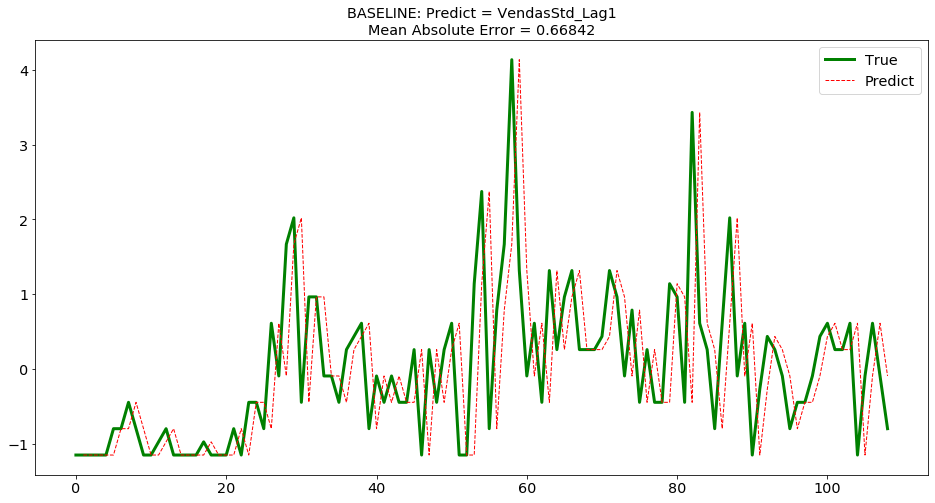

In [118]:
prod= melt[melt['Codigo']==1]
# multiple line plot
plt.plot( 'Week', 'VendasStd', data=prod, marker='', markerfacecolor='blue', markersize=12, color='green', linewidth=3,label="True")
plt.plot( 'Week', 'VendasStd_Lag1', data=prod, marker='', color='red', linewidth=1,label="Predict",linestyle='dashed')
plt.legend()
plt.title('BASELINE: Predict = VendasStd_Lag1\nMean Absolute Error = %.5f' % np.mean(mean_error))


# 1o MODELO: RANDOM FOREST REGRESSOR
PRODUTO A PRODUTO

MAE: 0.30068

In [119]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [120]:
mean_error = []
for c in range(1,21):
    prod = melt[melt['Codigo'] == c]
    prod = prod.drop(['Vendas'],axis=1)
    y = prod.dropna().VendasStd
    X = prod.dropna().drop(['VendasStd'], axis=1)
    
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)
    rfr = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    rfr.fit(X_train, y_train)
    p_RFR = mdl.predict(X_test)
    MAE_RFR = mae(y_test, p_RFR)
    
    mean_error.append(MAE_RFR)
    print('Codigo %d - MAE_RFR: %.5f' % (c, MAE_RFR))
print('Mean Absolute Error = %.5f' % np.mean(mean_error))

Codigo 1 - MAE_RFR: 0.29716
Codigo 2 - MAE_RFR: 0.26295
Codigo 3 - MAE_RFR: 0.37717
Codigo 4 - MAE_RFR: 0.39992
Codigo 5 - MAE_RFR: 0.38598
Codigo 6 - MAE_RFR: 0.32845
Codigo 7 - MAE_RFR: 0.19609
Codigo 8 - MAE_RFR: 0.31824
Codigo 9 - MAE_RFR: 0.38842
Codigo 10 - MAE_RFR: 0.29087
Codigo 11 - MAE_RFR: 0.23984
Codigo 12 - MAE_RFR: 0.39445
Codigo 13 - MAE_RFR: 0.32202
Codigo 14 - MAE_RFR: 0.26877
Codigo 15 - MAE_RFR: 0.31333
Codigo 16 - MAE_RFR: 0.29227
Codigo 17 - MAE_RFR: 0.41443
Codigo 18 - MAE_RFR: 0.24378
Codigo 19 - MAE_RFR: 0.23729
Codigo 20 - MAE_RFR: 0.04221
Mean Absolute Error = 0.30068


# 2o MODELO 2:  LGBM
PRODUTO A PRODUTO

MAE:0.57956

In [121]:
mean_error = []

for c in range(1,21):
    prod = melt[melt['Codigo'] == c]
    prod = prod.drop(['Vendas'],axis=1)
    y = prod.dropna().VendasStd
    X = prod.dropna().drop(['VendasStd'], axis=1)
    
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)
    
    lgbm = LGBMRegressor(n_estimators=500, learning_rate=0.01)
    lgbm.fit(X_train, y_train)
    p_LGBM = lgbm.predict(X_test)
    MAE_LGBM = mae(y_test,p_LGBM)
    
    mean_error.append(MAE_LGBM)
    print('Codigo %d - MAE_LGBM: %.5f' % (c, MAE_LGBM))
print('Mean Absolute Error = %.5f' % np.mean(mean_error))

Codigo 1 - MAE_LGBM: 0.45532
Codigo 2 - MAE_LGBM: 0.32606
Codigo 3 - MAE_LGBM: 0.67824
Codigo 4 - MAE_LGBM: 0.48092
Codigo 5 - MAE_LGBM: 0.45954
Codigo 6 - MAE_LGBM: 0.40469
Codigo 7 - MAE_LGBM: 0.16906
Codigo 8 - MAE_LGBM: 0.38286
Codigo 9 - MAE_LGBM: 0.76000
Codigo 10 - MAE_LGBM: 0.48323
Codigo 11 - MAE_LGBM: 0.63218
Codigo 12 - MAE_LGBM: 1.00555
Codigo 13 - MAE_LGBM: 0.30658
Codigo 14 - MAE_LGBM: 0.43407
Codigo 15 - MAE_LGBM: 0.78313
Codigo 16 - MAE_LGBM: 0.84818
Codigo 17 - MAE_LGBM: 0.92185
Codigo 18 - MAE_LGBM: 0.76930
Codigo 19 - MAE_LGBM: 1.02715
Codigo 20 - MAE_LGBM: 0.26335
Mean Absolute Error = 0.57956


# COMPARAÇÃO ENTRE OS MODELOS: RFR x LGBM

Escolha um Código de Produto [entre 1 e 201]: 10


Text(0.5, 1.0, 'Codigo 10 - LGBM: Predict x True\n MAE RFR: 0.29087\nMAE LGBM: 0.48323')

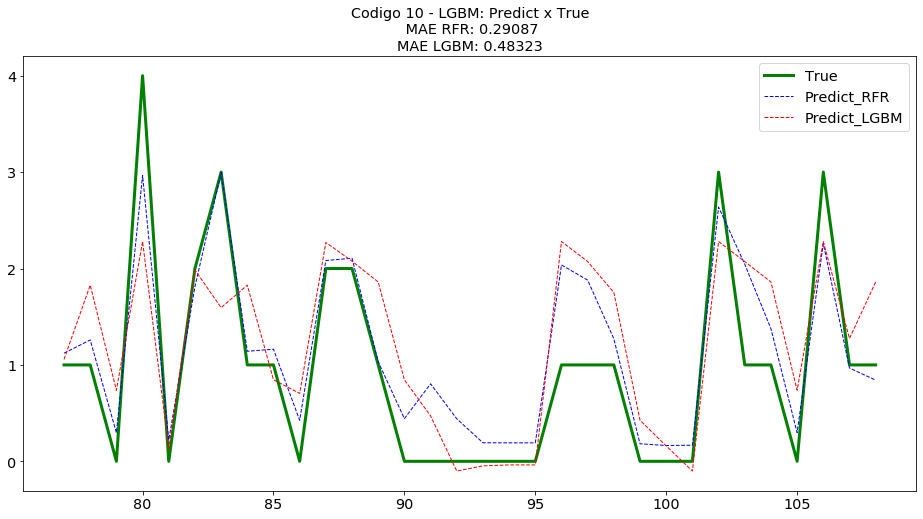

In [122]:
c = int(input('Escolha um Código de Produto [entre 1 e 201]: '))
prod = melt[melt['Codigo'] == c]
prod = prod.drop(['Vendas'],axis=1)
y = prod.dropna().VendasStd
X = prod.dropna().drop(['VendasStd'], axis=1)
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

#Random Forest Regressor:
rfr = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
rfr.fit(X_train, y_train)
p_RFR = mdl.predict(X_test)
MAE_RFR = mae(y_test, p_RFR)

X_test_RFR = X_test.copy()
X_test_RFR['VendasStd_True'] = pd.Series(y_test)
X_test_RFR['PredictStd'] = p_RFR
X_test_RFR['MAE'] = abs(X_test_RFR['VendasStd_True'] - X_test_RFR['PredictStd'])

X_test_RFR['Vendas_True'] = (X_test_RFR['VendasStd_True']*X_test_RFR['Desvio'])+X_test_RFR['Media']
X_test_RFR['Predict_True'] = (X_test_RFR['PredictStd']*X_test_RFR['Desvio'])+X_test_RFR['Media']
X_test_RFR['MAE_True'] = abs(X_test_RFR['Vendas_True'] - X_test_RFR['Predict_True'])

#LGBM
lgbm = LGBMRegressor(n_estimators=500, learning_rate=0.01)
lgbm.fit(X_train, y_train)
p_LGBM = lgbm.predict(X_test)
MAE_LGBM = mae(y_test,p_LGBM)

X_test_LGBM = X_test.copy()
X_test_LGBM['VendasStd_True'] = pd.Series(y_test)
X_test_LGBM['PredictStd'] = p_LGBM
X_test_LGBM['MAE'] = abs(X_test_LGBM['VendasStd_True'] - X_test_LGBM['PredictStd'])

X_test_LGBM['Vendas_True'] = (X_test_LGBM['VendasStd_True']*X_test_LGBM['Desvio'])+X_test_LGBM['Media']
X_test_LGBM['Predict_True'] = (X_test_LGBM['PredictStd']*X_test_LGBM['Desvio'])+X_test_LGBM['Media']
X_test_LGBM['MAE_True'] = abs(X_test_LGBM['Vendas_True'] - X_test_LGBM['Predict_True'])

# multiple line plot
plt.plot( 'Week', 'Vendas_True', data=X_test_LGBM, marker='', markerfacecolor='blue', markersize=12, color='green', linewidth=3,label="True")
plt.plot( 'Week', 'Predict_True', data=X_test_RFR, marker='', color='blue', linewidth=1,label="Predict_RFR",linestyle='dashed')
plt.plot( 'Week', 'Predict_True', data=X_test_LGBM, marker='', color='red', linewidth=1,label="Predict_LGBM",linestyle='dashed')
plt.legend()
plt.title('Codigo %d - LGBM: Predict x True\n MAE RFR: %.5f\nMAE LGBM: %.5f' % (c, MAE_RFR,MAE_LGBM))

# SHAP VALUES

Escolha um Código de Produto [entre 1 e 201]: 10
Codigo 10 - Shap Value - Features Explainer


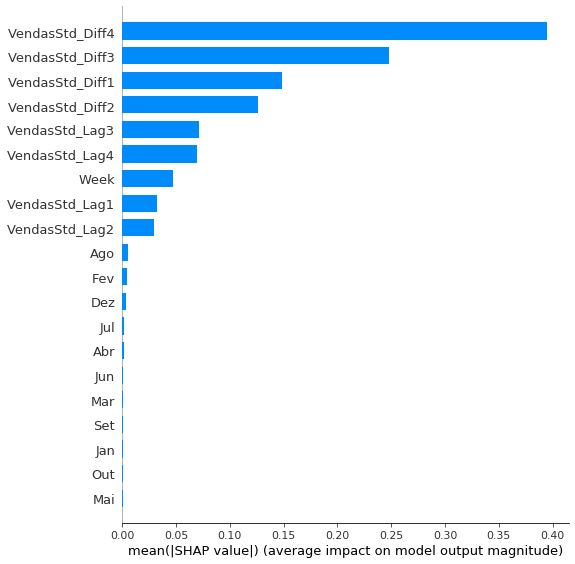

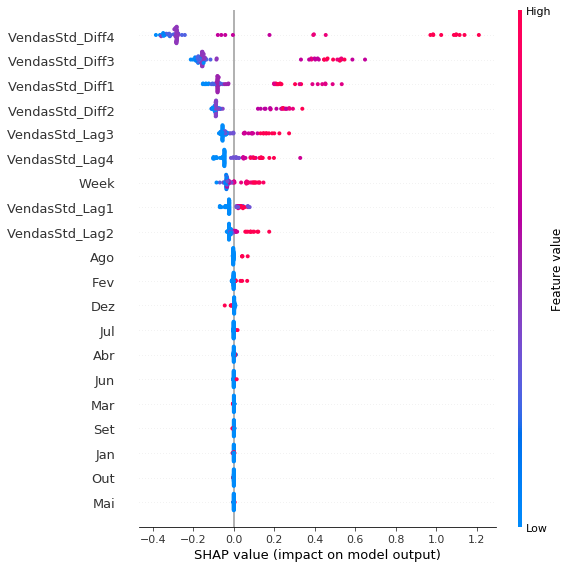

In [123]:
import shap
shap.initjs()

c = int(input('Escolha um Código de Produto [entre 1 e 201]: '))
prod = melt[melt['Codigo'] == c]
prod = prod.drop(['Vendas'],axis=1)
y = prod.dropna().VendasStd
X = prod.dropna().drop(['VendasStd'], axis=1)
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

import shap
shap_values = shap.TreeExplainer(rfr).shap_values(X_train)
print('Codigo %d - Shap Value - Features Explainer' % (c))
shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.summary_plot(shap_values, X_train)